# **WORLD HAPPINESS REPORT**


* Exploratory Data Analysis

 This provides an overview of exploratory data analysis (EDA). It encompasses both non-graphical methods, such as statistical tests, and graphical techniques, including univariate and multivariate visualizations.

 *The primary goal of EDA is to understand the dataset and uncover underlying patterns, trends, and anomalies.

*It is an open-ended process that helps generate hypotheses, understand the data’s structure, and determine appropriate analysis techniques.

*EDA is used to visually and numerically summarize the key characteristics of the data before applying more formal statistical methods

## Objectives

* Performing an exploratory data analysis to outline and illustrate significant trends and insights within the dataset.

## Inputs

* Using before cleaned and combined data C:\Users\balla\OneDrive\Documents\CapStoneProject_2025\Data\Combined_Cleaned.csv

## Outputs

 Descriptive statistics of important variables in the dataset.

Visual representations such as histograms, box plots, and correlation matrices.

Detection of data quality concerns, trends, and patterns. 





 For EDA, we will:

Examine the dataset structure to understand the columns, data types, and missing values.
Visualize the data to identify trends, outliers, and distributions.
Check for correlations between numerical features.
Handle missing values by either dropping or imputing them.



* 1.1 Data Structure Overview:

 Inspect the columns and data types.

In [11]:
import pandas as pd

# Load Dataset
df = pd.read_csv(r"C:\Users\balla\OneDrive\Documents\CapStoneProject_2025\Data\Combined_Cleaned.csv")
# Show first 5 rows
print(df.head())

# general information about the dataset
print(df.info())

# summary statistics
print(df.describe())


  Country_name  Happiness_Rank  Happiness_score  Upperwhisker  Lowerwhisker  \
0      Finland               1             7.81          7.87          7.75   
1      Denmark               2             7.65          7.71          7.58   
2  Switzerland               3             7.56          7.63          7.49   
3      Iceland               4             7.50          7.62          7.39   
4       Norway               5             7.49          7.56          7.42   

   Economy_GDP_per_Capita  Social_support  Healthy_life_expectancy  \
0                    1.29            1.50                     0.96   
1                    1.33            1.50                     0.98   
2                    1.39            1.47                     1.04   
3                    1.33            1.55                     1.00   
4                    1.42            1.50                     1.01   

   Freedom_to_make_life_choices  Generosity  Perceptions_of_corruption  \
0                          0.6

Country_name                    0
Happiness_Rank                  0
Happiness_score                 0
Upperwhisker                    0
Lowerwhisker                    0
Economy_GDP_per_Capita          0
Social_support                  0
Healthy_life_expectancy         0
Freedom_to_make_life_choices    0
Generosity                      0
Perceptions_of_corruption       0
Year                            0
dtype: int64


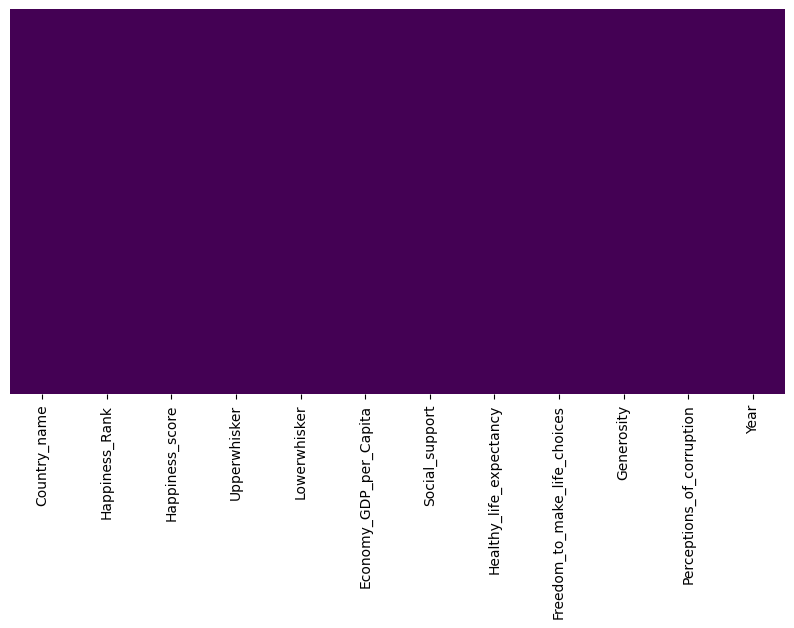

In [12]:
# missing values
print(df.isnull().sum())

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()


* 1.2 Data Cleaning:
Make sure column names are consistent (no spaces or special characters) and handle missing values.
We checked  ETL section

* 1.3 Visualizations:

Visualize the data with the following:

Histogram: To visualize the distribution of numerical columns like "Happiness score", "Economy (GDP per Capita)", etc.

Box Plot: To check for outliers in numerical data.

Correlation Heatmap: To identify relationships between numerical columns.

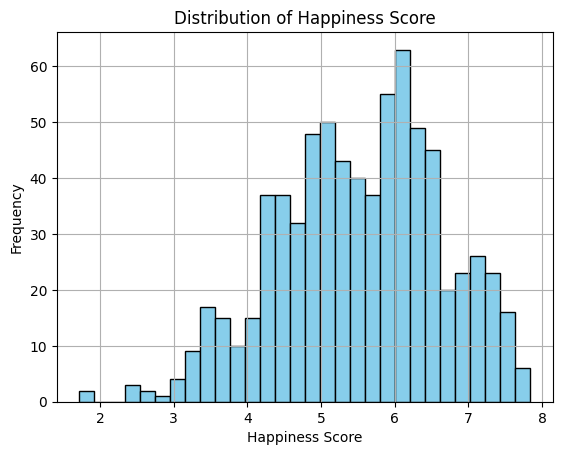

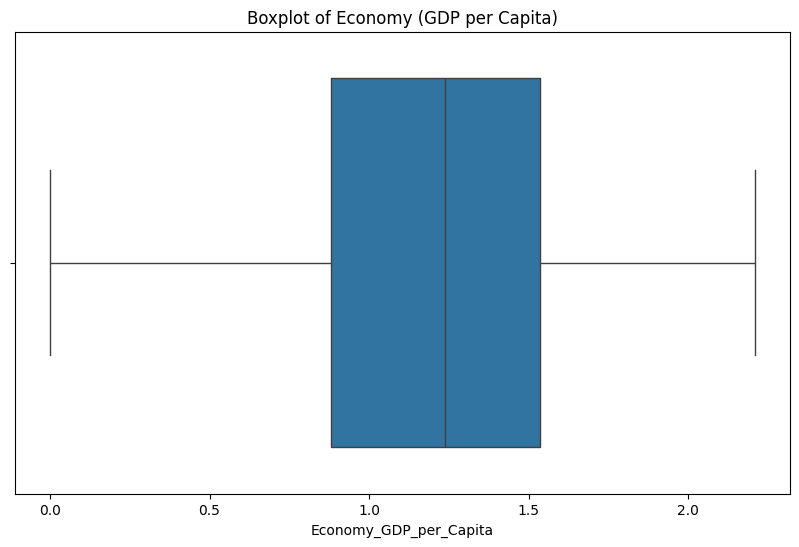

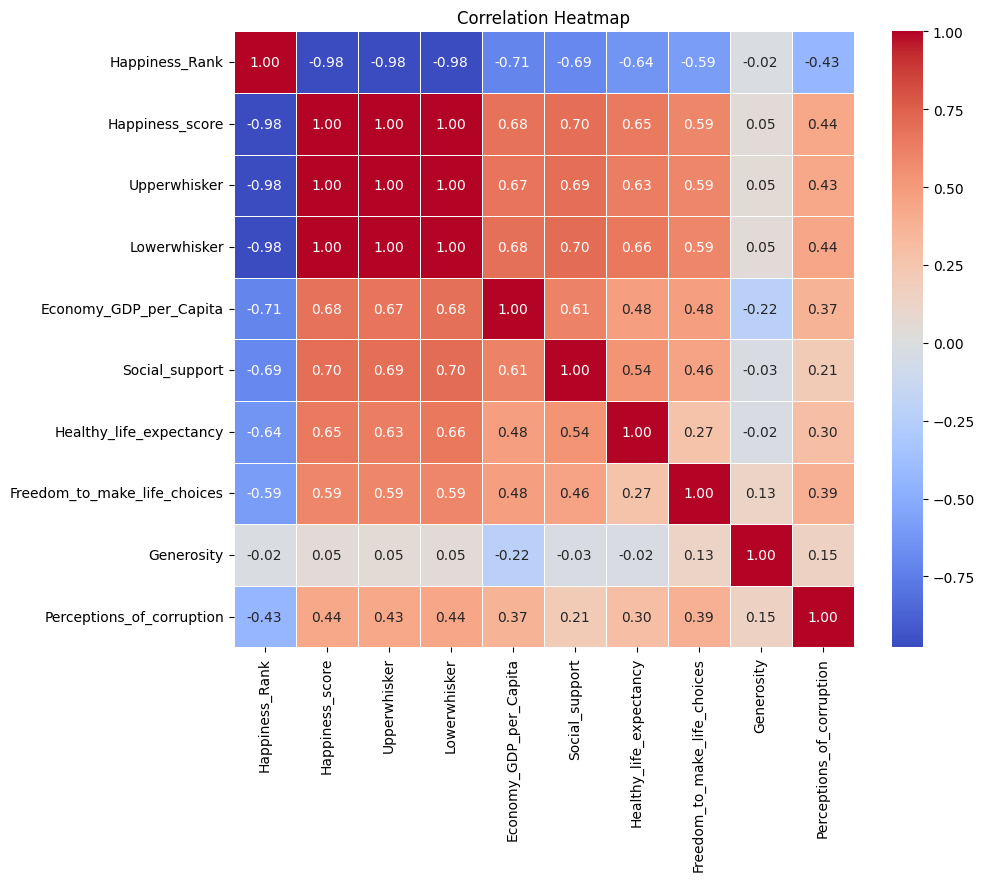

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Happiness Score Distribution
df['Happiness_score'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

# Boxplot for Economy (GDP per Capita)
plt.figure(figsize=(10,6))
sns.boxplot(x='Economy_GDP_per_Capita', data=df)
plt.title("Boxplot of Economy (GDP per Capita)")
plt.show()

# Correlation Heatmap

numeric_df = df.select_dtypes(include=['number']) # Select only numeric columns
# Compute the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


* 1.4 Pair Plot (Optional):
If we want to see relationships between multiple features at once, a pair plot is useful.

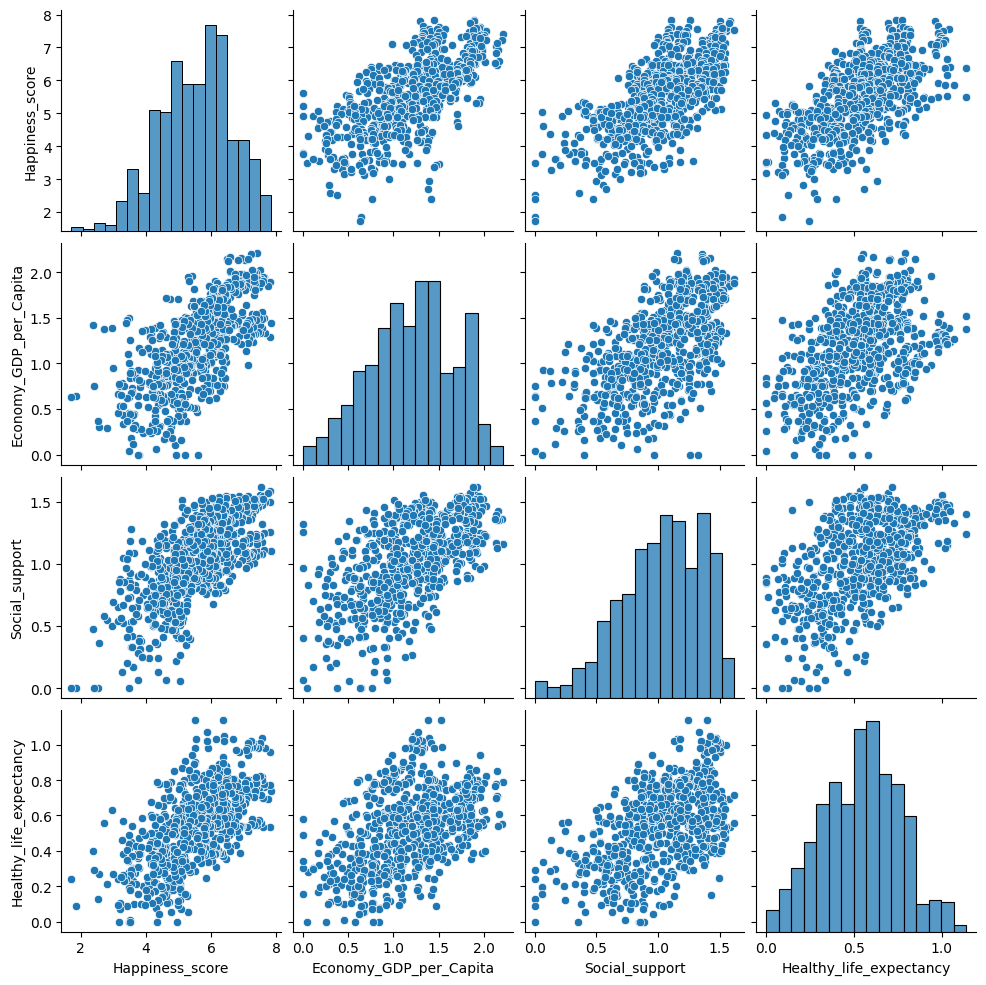

In [14]:
sns.pairplot(df[['Happiness_score', 'Economy_GDP_per_Capita', 'Social_support', 'Healthy_life_expectancy']])
plt.show()


Top 10 Happiest Countries



C:\Users\balla\AppData\Local\Temp\ipykernel_13412\1952214918.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="coolwarm")


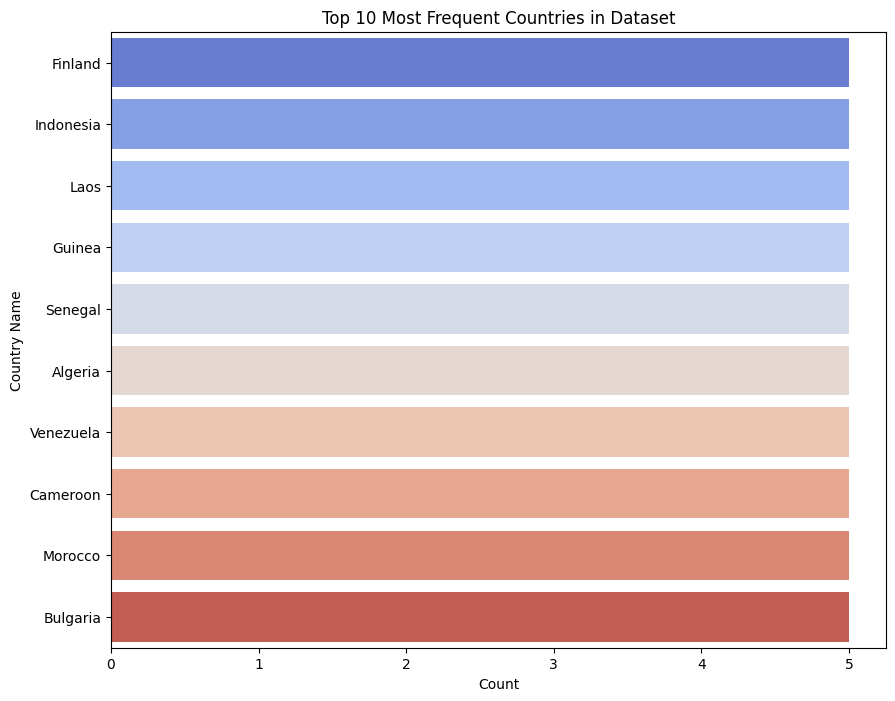

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# top 10 most frequent countries
top_countries = df["Country_name"].value_counts().nlargest(10)

# barplot
plt.figure(figsize=(10, 8))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Country Name")
plt.title("Top 10 Most Frequent Countries in Dataset")
plt.show()




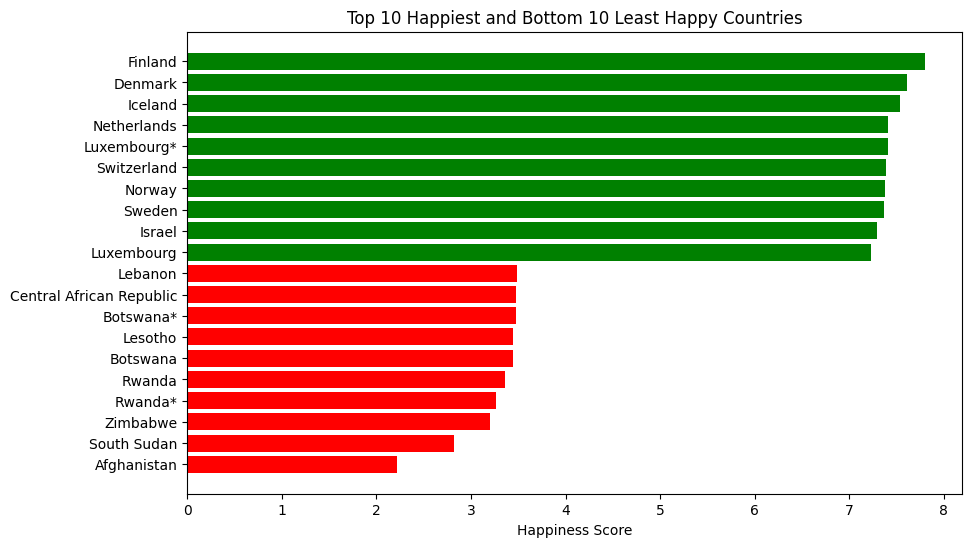

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv(r"C:\Users\balla\OneDrive\Documents\CapStoneProject_2025\Data\Combined_Cleaned.csv")

# Group by 'Country_name' and calculate the average happiness score for each country
df_avg = df.groupby('Country_name')['Happiness_score'].mean().reset_index()

# Sort the dataframe by happiness score in descending order
df_sorted = df_avg.sort_values(by='Happiness_score', ascending=False)

# Get the top 10 happiest countries and the bottom 10 least happy countries
top_10 = df_sorted.head(10)
bottom_10 = df_sorted.tail(10)

# Combine top 10 and bottom 10
top_bottom_10 = pd.concat([top_10, bottom_10])

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_bottom_10['Country_name'], top_bottom_10['Happiness_score'], color=['green']*10 + ['red']*10)

# Add titles and labels
plt.xlabel('Happiness Score')
plt.title('Top 10 Happiest and Bottom 10 Least Happy Countries')
plt.gca().invert_yaxis()  # Invert y-axis to show highest scores on top

# Display the plot
plt.show()


---

Analyze Happiness Trends Over Time

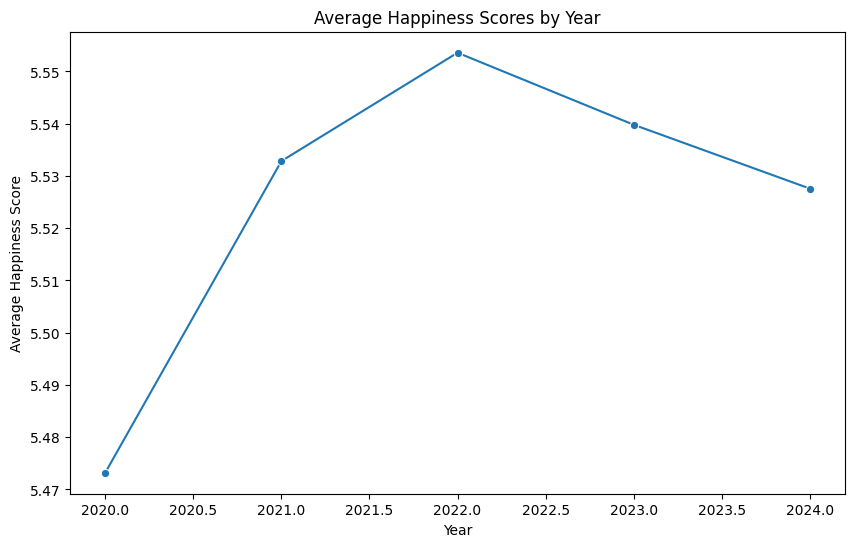

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv(r"C:\Users\balla\OneDrive\Documents\CapStoneProject_2025\Data\Combined_Cleaned.csv")

# Ensure the 'Year' column is in datetime format
df['Year'] = pd.to_datetime(df['Year']).dt.year

# Group by Year and calculate the average Happiness Score for each year
average_happiness = df.groupby('Year')['Happiness_score'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_happiness.index, y=average_happiness.values, marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Scores by Year')

# Display the plot
plt.show()


---